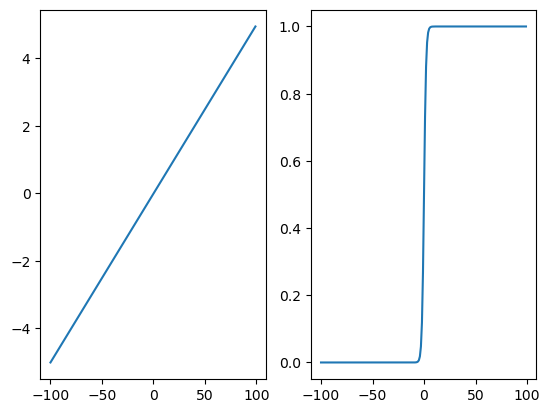

In [1]:
import numpy
import matplotlib.pyplot as graph

def sigmoid(x,m,c):
    return 1/(1+numpy.exp(-x))

x=numpy.arange(-100,100,1)
m=0.05
c=-0.01


fig,(linear,logistic)=graph.subplots(1,2)
linear.plot(x,m*x+c)
logistic.plot(x,sigmoid(x,m,c))

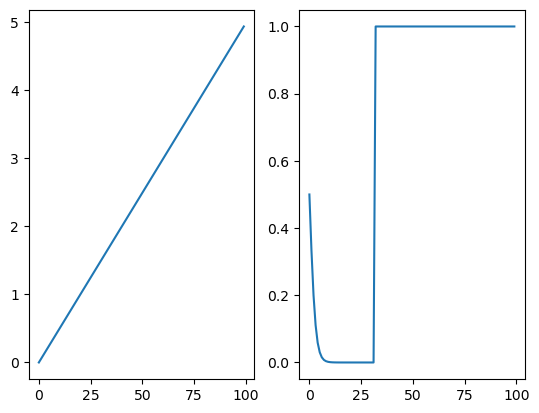

In [2]:
import numpy
import matplotlib.pyplot as graph

def sigmoid(x,m,c):
    return 1/(1+2**(x))

x=numpy.arange(0,100,1)
m=0.05
c=-0.01


fig,(linear,logistic)=graph.subplots(1,2)
linear.plot(x,m*x+c)
logistic.plot(x,sigmoid(x,m,c))

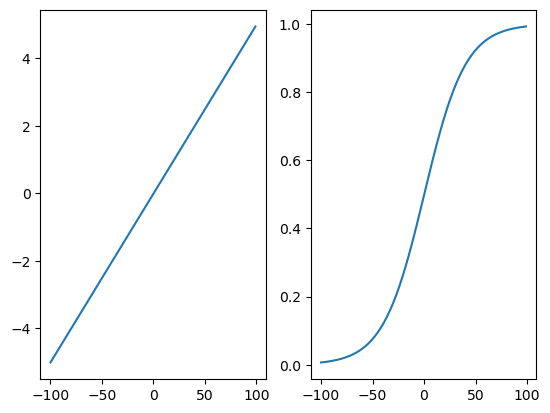

In [3]:
import numpy
import matplotlib.pyplot as graph

def sigmoid(x,m,c):
    return 1/(1+numpy.exp(-(m*x+c)))

x=numpy.arange(-100,100,1)
m=0.05
c=-0.01


fig,(linear,logistic)=graph.subplots(1,2)
linear.plot(x,m*x+c)
logistic.plot(x,sigmoid(x,m,c))

In [4]:
import numpy
import pandas
import matplotlib.pyplot as graph

df=pandas.DataFrame(data={'x':[0,1,2,3,4,5,6,7,8,9,10,11,12,13],'y':[0,0,0,0,0,1,0,0,1,1,1,1,1,1]})

In [5]:
#Lets dp linesar regression firstly

N=len(df.x)
x_mean=df.x.mean()
y_mean=df.y.mean()

num=0
den=0

for i in range(N):
    num=num+((df.x[i]-x_mean)*(df.y[i]-y_mean))
    den=den+(df.x[i]-x_mean)**2
    
m=num/den
c=y_mean-m*x_mean
print("numerator =",num)
print("denominator =",den)
print("Value of m is =",m)
print("Value of c is =",c)


numerator = 22.5
denominator = 227.5
Value of m is = 0.0989010989010989
Value of c is = -0.1428571428571428


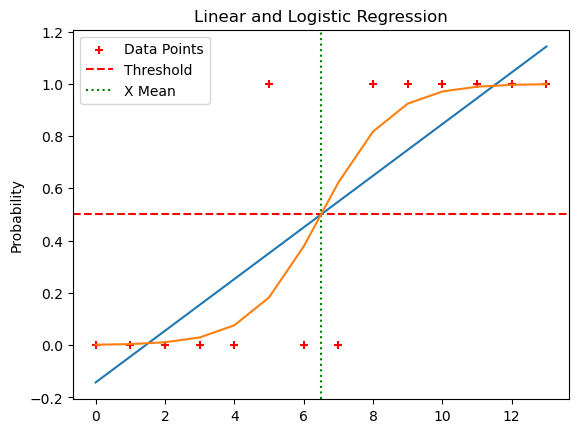

In [6]:
graph.title('Linear and Logistic Regression')
graph.ylabel('Probability')
graph.scatter(df.x, df.y, marker='+',color='r', label='Data Points')
graph.axhline(y=0.5, color='r', linestyle='--', label='Threshold')
graph.axvline(x=x_mean, color='g', linestyle=':', label='X Mean')
graph.legend(frameon=True)
# Let's Regress and Visualize
# Second Logistic Regression means sigmoid function
# Mean centering to properly fit the s-curve
# Use of x_mean is data dependent
def sigmoid(x):
    return 1/(1+numpy.exp(-(x-x_mean)))
graph.plot(df.x, m*df.x+c)
graph.plot(df.x, sigmoid(df.x))

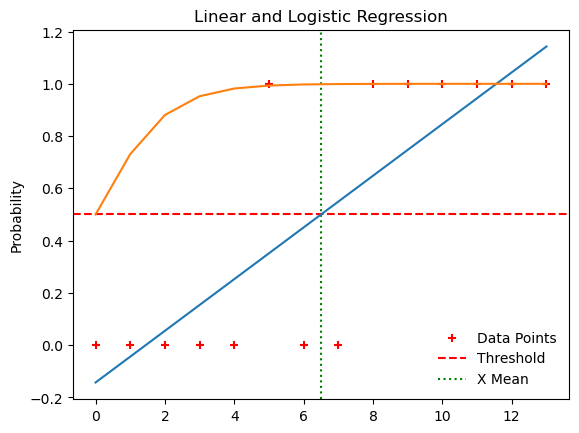

In [7]:
graph.title('Linear and Logistic Regression')
graph.ylabel('Probability')
graph.scatter(df.x, df.y, marker='+',color='r', label='Data Points')
graph.axhline(y=0.5, color='r', linestyle='--', label='Threshold')
graph.axvline(x=x_mean, color='g', linestyle=':', label='X Mean')
graph.legend(frameon=False)
# Let's Regress and Visualize
# Second Logistic Regression means sigmoid function
# Mean centering to properly fit the s-curve
# Use of x_mean is data dependent
def sigmoid(x):
    return 1/(1+numpy.exp(-(x)))
graph.plot(df.x, m*df.x+c)
graph.plot(df.x, sigmoid(df.x))

In [8]:
import numpy
import pandas
import matplotlib.pyplot as graph
#import gspread
#from google.colab import auth
#from google.auth import default

#auth.authenticate_user()
#creds,_=default()
#gc=gspread.authorize(creds)

df1=pandas.read_csv(r"C:\Users\PRATHMESH\OneDrive\Desktop\insurance-age-C.csv")
print(df1)

df1.columns

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\PRATHMESH\\OneDrive\\Desktop\\insurance-age-C.csv'

In [ ]:
df1=df1.rename(columns={'age':'x','purchased_insurance':'y'})
print(df1)
df1.info()
# By default the values received from Google spreadsheet are String
#So we have to typecast the values
df1.x=df1.x.astype(float) 
df1.y=df1.y.astype(float)
df1.sort_values(by=['x'], ascending=False, inplace=True)
x_mean = df1.x.mean()
print(df1)
print(x_mean)

In [ ]:
def sigmoid(x):
    return 1/(1+numpy.exp(-(x-x_mean)))
#Plot the sigmoid plot
fig,logistic=graph.subplots(1,1)
logistic.plot(df1.x,sigmoid(df1.x))
logistic.scatter(df1.x, df1.y, marker='+',color='r', label='Data Points')
logistic.axhline(y=0.5, color='r', linestyle='--', label='Threshold')
logistic.axvline(x=x_mean, color='g', linestyle=':', label='X Mean')

In [ ]:
def sigmoid(x,x_mean):
    return 1/(1+numpy.exp(-(x-x_mean)))
def willpurchase(x,x_mean):
    probability=sigmoid(x,x_mean)
    if probability >=0.5:
        return "There is "+ str(probability*100)+"%chance of purchasing"
    return "No they will not purchase"

In [ ]:
p=willpurchase(41,x_mean)
print(p)

In [ ]:
#logistic regressiikn  using libnrary

#split the dataframe into indfependent and dependent variable

#;Logistic Regression Using Library

x=df1.drop("y",axis=1)
#we want to drop column
#So axis=1

y=df1['y']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

#print(x_train)
print(x_test)
#print(y_train)
print(y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

my_model=LogisticRegression()
my_model.fit(x_train,y_train)

In [ ]:
y_predictions=my_model.predict(x_test)

print(x_test)
print(y_predictions)

In [ ]:
## Using Ready Library Functikns

def willpurchase(my_model,age):
    prediction=my_model.predict([[age]])
    if prediction[0]==0:
        print("They won't purchase insurance")
    else:
        print("They will purchase insurance")
        
        
willpurchase(my_model,30)